### 1) Performing data quality checks by checking for missing values, if any.

In [2]:
# importing data and performing EDA
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv(r'C:\Users\Dell\OneDrive\Documents\Simplilearn_AI_progm\ML_Nimisha\projects\1717492857_hr_comma_sep\HR_comma_sep.csv')

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
# The sales column need to be renamed as it has values with name sales too.
data.rename(columns={'sales':'department'}, inplace=True)
data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Checking for any null values in dataset
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Since there are no null values in dataset, we will move to check data object types
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

##### Department and salary column are object types which needs to be converted into numerical values.

### 2. Understanding what factors contributed most to employee turnover at EDA. 
#### 2.1. Drawing a heatmap of the correlation matrix between all numerical features or columns in the data. 

In [9]:
corr= data.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


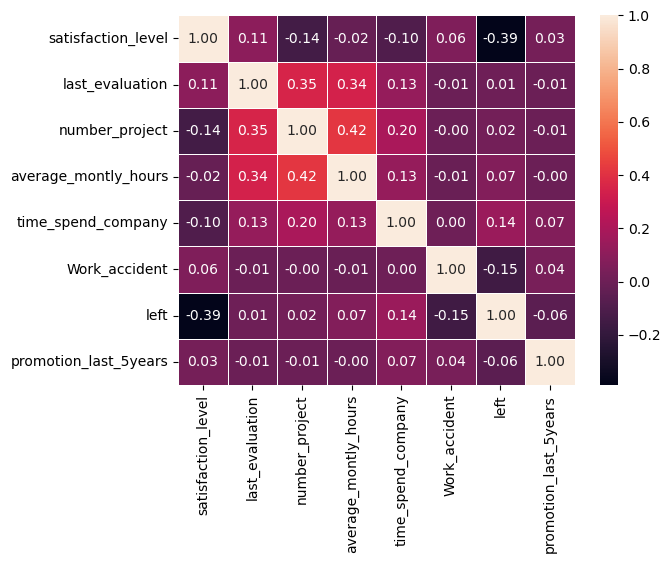

In [10]:
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot=True, fmt=".2f", linewidth=.5)
corr

 ####  2.2 Drawing  the distribution plot of: 
   ■ Employee Satisfaction (using column satisfaction_level) 
   ■ Employee Evaluation (using column last_evaluation) 
   ■ Employee Average Monthly Hours (using column 
      average_montly_hours) 

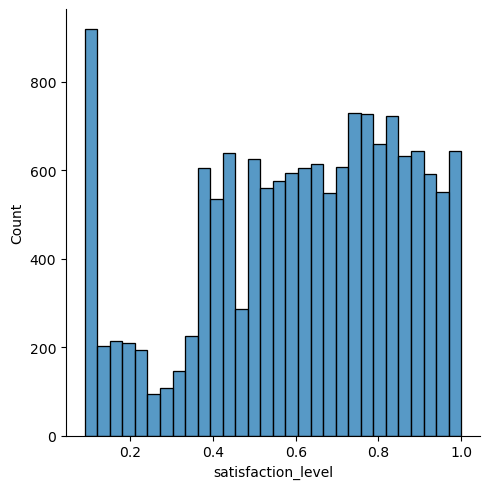

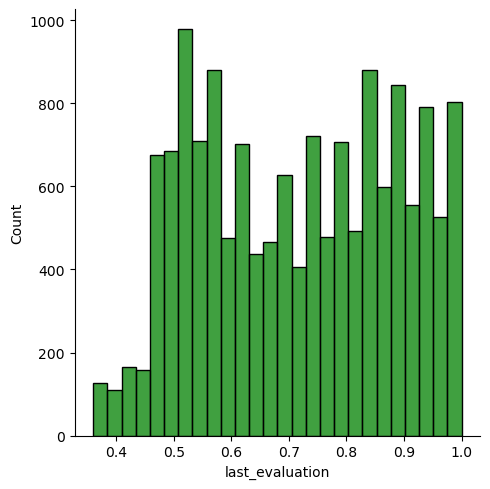

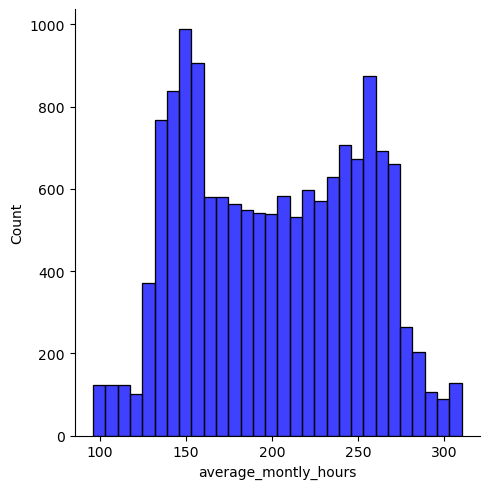

In [11]:
# Distribution plot for Employee Satisfaction
sns.displot(data= data, x='satisfaction_level',kind='hist')

# Distribution plot for Employee Evaluation
sns.displot(data=data, x='last_evaluation', kind='hist', color='green')

# Distribution plot for Employee average monthly hours
sns.displot(data=data, x='average_montly_hours', kind='hist', color='blue')

#### 2.3 Drawing the bar plot of the employee project count of both employees who left and stayed in the organization (using column number_project and hue column left), and providing inferences from the plot.

<Axes: xlabel='number_project', ylabel='number_project'>

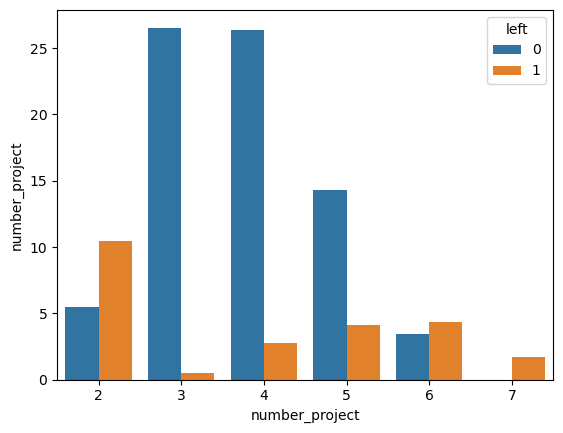

In [12]:
sns.barplot(data=data, x='number_project',y='number_project', hue='left', estimator=lambda x: len(x) / len(data) * 100)

##### Inferences from the above plots
1) There is high positive corelation between number of projects vs average monthly hour, number of projects vs evaluation and 
average monthly hour vs evaluation. This suggests that employees who spent more hours , completed more projects and were evaluated higher.

2) There is negative corelation between left and satisfaction level which suggests that people who were less satisfied were more prone to leave the organisation.

3) The distribution plot of last evaluation and average monthly hour has the same pattern suggesting that they are corelated.

4) From the barplot it is clear that employees who have worked on lesser project and on more projects have left the organisations.



### 3. Performing clustering of employees who left based on their satisfaction and evaluation. 
3.1. Chose columns satisfaction_level, last_evaluation, and left.
3.2. K-means clustering of employees who left the company into 3 
clusters.
 



In [13]:
data_cluster=data[["satisfaction_level","last_evaluation","left"]]

In [14]:
data_cluster

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans= KMeans(n_clusters=3, random_state=123)
label = kmeans.fit_predict(data_cluster)

In [17]:
label

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
data_cluster['cluster']=label

In [19]:
data_cluster

,satisfaction_level,last_evaluation,left,cluster
0,0.38,0.53,1,1
1,0.80,0.86,1,1
2,0.11,0.88,1,1
3,0.72,0.87,1,1
4,0.37,0.52,1,1
...,...,...,...,...
14994,0.40,0.57,1,1
14995,0.37,0.48,1,1
14996,0.37,0.53,1,1
14997,0.11,0.96,1,1


In [20]:
kmeans.cluster_centers_

array([[8.14426303e-01, 7.38946974e-01, 7.24420524e-15],
       [4.40098012e-01, 7.18112574e-01, 1.00000000e+00],
       [4.59425505e-01, 6.82495791e-01, 3.44169138e-15]])

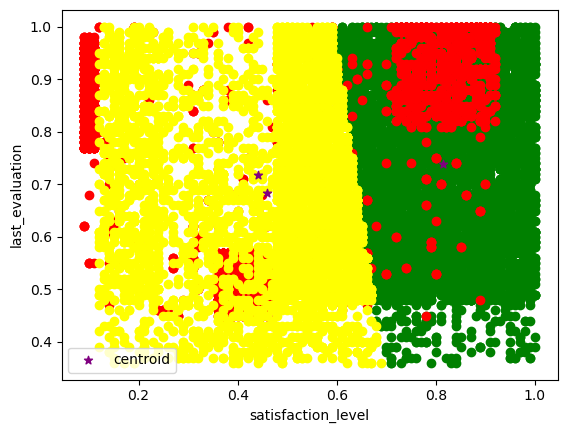

In [21]:
cluster1=data_cluster[data_cluster.cluster==0]
cluster2=data_cluster[data_cluster.cluster==1]
cluster3=data_cluster[data_cluster.cluster==2]
plt.scatter(cluster1['satisfaction_level'],cluster1['last_evaluation'],color='green')
plt.scatter(cluster2['satisfaction_level'],cluster2['last_evaluation'],color='red')
plt.scatter(cluster3['satisfaction_level'],cluster3['last_evaluation'],color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()

### 4. Handled the left Class Imbalance using the SMOTE technique. 

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
data['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [25]:
department = pd.get_dummies(data['department'], prefix='department', prefix_sep='_', drop_first=True)

In [26]:
department

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,True,False
14995,False,False,False,False,False,False,False,True,False
14996,False,False,False,False,False,False,False,True,False
14997,False,False,False,False,False,False,False,True,False


In [27]:
data['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [28]:
salary =  pd.get_dummies(data['salary'], prefix='salary', prefix_sep='_', drop_first=True)
salary

,salary_low,salary_medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [29]:
data1 = pd.concat([data,department,salary], axis=1)
data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,False,True,False,False,True,False


In [30]:
data1 = data1.drop(['department','salary'],axis=1)
data1.shape

(14999, 19)

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   department_RandD        14999 non-null  bool   
 9   department_accounting   14999 non-null  bool   
 10  department_hr           14999 non-null  bool   
 11  department_management   14999 non-null  bool   
 12  department_marketing    14999 non-null  bool   
 13  department_product_mng  14999 non-null  bool   
 14  department_sales        14999 non-null

In [32]:
X = data1.drop(['left'],axis=1)
y = data1['left']

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

In [34]:
sss= StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)

In [35]:
for train,test in sss.split(X,y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

left
0    9142
1    2857
Name: count, dtype: int64
left
0    2286
1     714
Name: count, dtype: int64


In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11999, 18)
(11999,)
(3000, 18)
(3000,)


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts()) 

(18284, 18)
(18284,)
left
0    9142
1    9142
Name: count, dtype: int64


### 5.Performed 5-fold cross-validation model training and evaluate performance.

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### 5.1 Train a logistic regression model, apply a 5-fold CV, and plot the classification report. 

In [40]:
lr = LogisticRegression(solver='lbfgs',multi_class='ovr')
lr.fit(X_train, y_train)
score_lr=cross_val_score(lr,X_train, y_train, cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.75745146 0.77768663 0.81487558 0.79217938 0.80497812]
Avg : 0.7894342345156227


In [41]:
pred_lr = cross_val_predict(lr, X_test, y_test, cv=5)
pred_lr

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.61      0.35      0.44       714

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



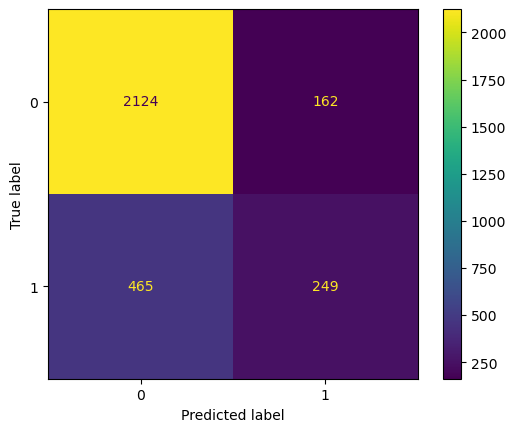

In [43]:
cm_lr = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(cm_lr)
disp.plot()

#### 5.2 Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [44]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
score_rf=cross_val_score(rf,X_train, y_train, cv=5)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.98304621 0.98414001 0.98140552 0.98441345 0.98605033]
Avg : 0.9838111047486041


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2286
           1       0.99      0.90      0.94       714

    accuracy                           0.97      3000
   macro avg       0.98      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



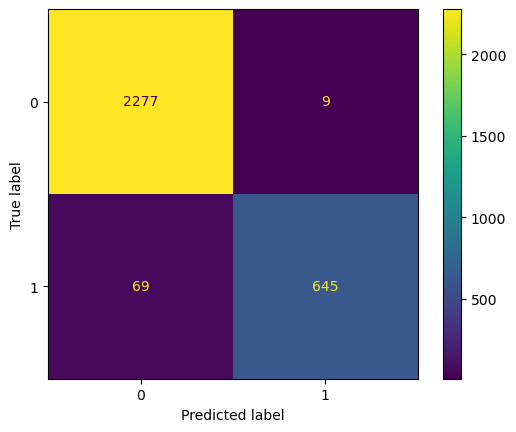

In [45]:
pred_rf = cross_val_predict(rf, X_test, y_test, cv=5)
print(classification_report(y_test,pred_rf))
cm_rf = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(cm_rf)
disp.plot()

#### 5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report. 

In [46]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb.fit(X_train, y_train)
score_gb=cross_val_score(gb,X_train, y_train, cv=5)
print(score_gb)
print("Avg :",np.average(score_gb))

[0.94695105 0.94558381 0.95269346 0.95105278 0.95486871]
Avg : 0.9502299627404414


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2286
           1       0.92      0.91      0.91       714

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



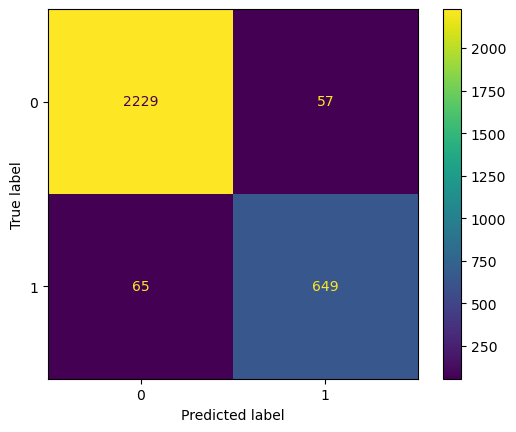

In [47]:
pred_gb = cross_val_predict(gb, X_test, y_test, cv=5)
print(classification_report(y_test,pred_gb))
cm_gb = confusion_matrix(y_test, pred_gb)
disp = ConfusionMatrixDisplay(cm_gb)
disp.plot()

### 6. Identifying the best model and justifying the evaluation metrics used.

In [48]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % logit_roc_auc)

rf_roc_auc= roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest Classification AUC = %2.2f" % rf_roc_auc )

gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
print ("Gradient Boosting Classification AUC = %2.2f" % gb_roc_auc )



Logistic Regression AUC = 0.74
Random Forest Classification AUC = 0.98
Gradient Boosting Classification AUC = 0.94


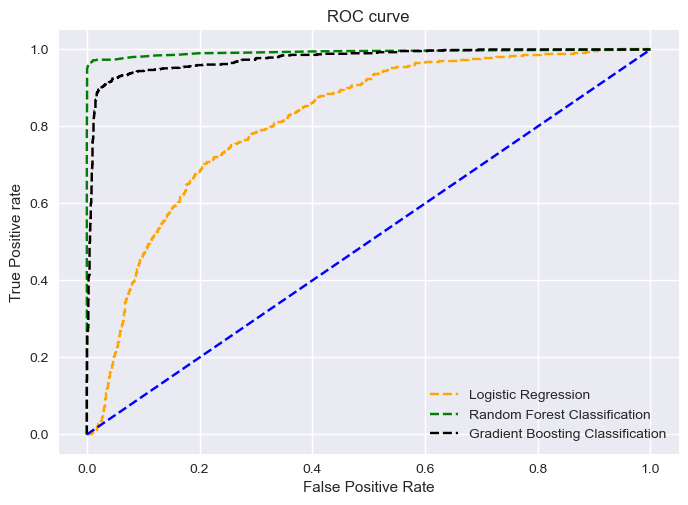

In [49]:
# Plotting ROC graph
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='green', label='Random Forest Classification')
plt.plot(gb_fpr, gb_tpr, linestyle='--',color='black', label='Gradient Boosting Classification')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


#### Conclusion: 
1. The best model as per the F1 score and AUC curve is Random forest Classification. 
2. False Negatives value should be low as per confusion matrix and hence recall is better metrices to find accuracy of the model.

### 7. Suggest various retention strategies for targeted employees. 

In [62]:
test_predictions = pd.DataFrame(data=pred_rf)
test_predictions

,0
0,1
1,1
2,0
3,0
4,0
...,...
2995,0
2996,1
2997,0
2998,0


In [63]:
test_predictions.rename(columns={0:'predictions'},inplace=True)
test_predictions.head()

,predictions
0,1
1,1
2,0
3,0
4,0


In [57]:
prob = cross_val_predict(rf, X_test, y_test, cv=5, method='predict_proba')
prob = prob[:, 1]
prob

array([1.   , 0.95 , 0.   , ..., 0.075, 0.025, 1.   ])

In [58]:
probability = pd.DataFrame(data=prob)
probability.head()

,0
0,1.000
1,0.950
2,0.000
3,0.025
4,0.000


In [59]:
probability.rename(columns={0:'probability'},inplace=True)
probability.head()

,probability
0,1.000
1,0.950
2,0.000
3,0.025
4,0.000


In [72]:
# Categorozing employess into four zones

conditions = [
    (probability['probability'] <= 0.2),
    (probability['probability'] > 0.2) & (probability['probability'] <= 0.6),
    (probability['probability'] > 0.6) & (probability['probability'] <= 0.9),
    (probability['probability'] > 0.9)
    ]

values = ['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone', 'High Risk Zone']


probability['zone'] = np.select(conditions, values)

probability.head()

,probability,zone
0,1.000,High Risk Zone
1,0.950,High Risk Zone
2,0.000,Safe Zone
3,0.025,Safe Zone
4,0.000,Safe Zone


In [73]:
print(X_test.shape)
print(test_predictions.shape)
print(probability.shape)

(3000, 19)
(3000, 1)
(3000, 2)


In [74]:
X_test = X_test.reset_index()

In [75]:
new_df = pd.concat([X_test,test_predictions,probability], axis=1)
new_df.head()

,level_0,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,...,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,predictions,probability,zone
0,0,439,0.41,0.52,2,136,3,0,0,False,...,False,False,False,False,True,True,False,1,1.000,High Risk Zone
1,1,649,0.46,0.50,2,156,3,0,0,False,...,False,False,False,False,True,False,True,1,0.950,High Risk Zone
2,2,8478,0.58,0.63,5,191,3,1,0,False,...,False,False,False,False,True,False,False,0,0.000,Safe Zone
3,3,13225,0.52,0.89,3,188,6,0,0,False,...,True,False,False,False,False,False,True,0,0.025,Safe Zone
4,4,7962,0.74,0.54,4,167,2,0,0,False,...,False,False,True,False,False,False,True,0,0.000,Safe Zone


In [76]:
new_df['zone'].value_counts()

zone
Safe Zone           2260
High Risk Zone       526
Medium Risk Zone     119
Low Risk Zone         95
Name: count, dtype: int64

<Axes: xlabel='number_project', ylabel='count'>

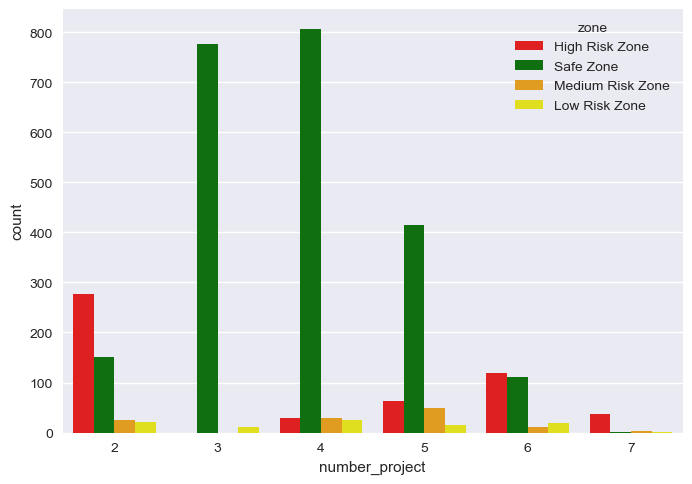

In [77]:
colors = {'High Risk Zone':'red', 'Safe Zone':'green', 'Medium Risk Zone':'orange', 'Low Risk Zone':'yellow'}
sns.countplot(data=new_df, x='number_project', hue='zone', palette= colors)